# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_null_ratios = df.isna().sum() / len(df)
df.drop(df_null_ratios[df_null_ratios > .1].index, axis=1, inplace=True)
df.dropna(inplace=True)

X_num = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]

ExterQual = pd.get_dummies(df['ExterQual'], drop_first=True)
BsmtQual = pd.get_dummies(df['BsmtQual'], drop_first=True)
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], drop_first=True)
KitchenQual = pd.get_dummies(df['KitchenQual'], drop_first=True)
GarageQual = pd.get_dummies(df['GarageQual'], drop_first=True)
GarageCond = pd.get_dummies(df['GarageCond'], drop_first=True)

X_cat = pd.concat([ExterQual, BsmtQual, BsmtFinType1, KitchenQual, GarageQual, GarageCond], axis=1)

scaler = StandardScaler()

X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

X = pd.concat([X_num, X_cat], axis=1)
y = df['SalePrice']

- Split your data into train and test sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = sm.add_constant(X_train)

- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [5]:
results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     263.9
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        22:41:27   Log-Likelihood:                -10950.
No. Observations:                 936   AIC:                         2.195e+04
Df Residuals:                     910   BIC:                         2.208e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.957e+05   2.56e+04     11.547      0.000    2.45e+05    3.46e+05
OverallQual  1.332e+04   1778.163      7.491      0.000    9830.225    1.68e+04
GrLivArea    3.389e+04   1326.799     25.546      0.000    3.13e+04    3.65e+04
GarageCars   5001.6251   1330.361      3.760      0.000    2390.692    7612.558
TotalBsmtSF  1.651e+04   1327.028     12.443      0.000    1.39e+04    1.91e+04
Fa          -5.243e+04   1.69e+04     -3.104      0.002   -8.56e+04   -1.93e+04
Gd          -2.804e+04   6265.198     -4.476      0.000   -4.03e+04   -1.57e+04
TA          -3.407e+04   6978.292     -4.883      0.000   -4.78e+04   -2.04e+04
Fa          -4.688e+04   8531.221     -5.495      0.000   -6.36e+04   -3.01e+04
Gd          -4.067e+04   4490.518     -9.056      0.000   -4.95e+04   -3.19e+04
TA          -4.641e+04   5259.043     -8.825      0.000   -5.67e+04   -3.61e+04
BLQ          -772.7674   3850.106     -0.201      0.841   -8328.886    6783.351
GLQ          5950.1019   3448.026      1.726      0.085    -816.906    1.27e+04
LwQ         -1.356e+04   4958.723     -2.734      0.006   -2.33e+04   -3827.259
Rec         -7316.2107   4157.264     -1.760      0.079   -1.55e+04     842.729
Unf         -1.224e+04   3312.849     -3.695      0.000   -1.87e+04   -5739.078
Fa          -3.953e+04   9685.562     -4.082      0.000   -5.85e+04   -2.05e+04
Gd          -2.904e+04   4815.458     -6.031      0.000   -3.85e+04   -1.96e+04
TA          -3.818e+04   5455.091     -6.998      0.000   -4.89e+04   -2.75e+04
Fa          -9.671e+04   3.11e+04     -3.114      0.002   -1.58e+05   -3.58e+04
Gd          -7.421e+04   3.15e+04     -2.353      0.019   -1.36e+05   -1.23e+04
Po          -7.204e+04   3.99e+04     -1.804      0.071    -1.5e+05    6311.766
TA          -8.481e+04   3.04e+04     -2.790      0.005   -1.44e+05   -2.52e+04
Fa           7.573e+04   9655.889      7.843      0.000    5.68e+04    9.47e+04
Gd           8.726e+04   1.25e+04      7.003      0.000    6.28e+04    1.12e+05
Po           4.902e+04   1.61e+04      3.035      0.002    1.73e+04    8.07e+04
TA           8.373e+04   8028.212     10.429      0.000     6.8e+04    9.95e+04
==============================================================================
Omnibus:                      233.475   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1886.093
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       9.716   Cond. No.                     1.23e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-27. This might indicate that there are
strong multicollinearity probl

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.

In [6]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

print("Mean absolute error (MAE): {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error (MSE): {}".format(mse(y_test, y_preds)))
print("Root mean squared error (RMSE): {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error (MAPE): {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error (MAE): 25663.37949975555
Mean squared error (MSE): 2596209914.6663294
Root mean squared error (RMSE): 50953.01673764105
Mean absolute percentage error (MAPE): 15.70173090938779


- Is the performance of your model satisfactory? Why?

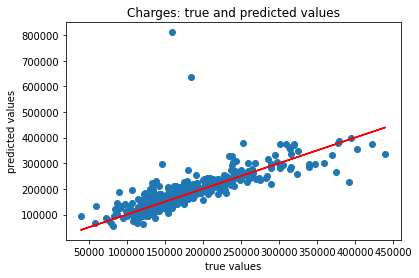

In [7]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

I think the model is quite satisfactory. It has an R-square of 0.879. Also, the mean of target variable (price) was approximately 186761 and its standard deviation was 79000. For such a variable, MAE of 25663.3 and RMSE of 50953 is satisfactory in my opinion.

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [8]:
#X['OverallQual_GrLivArea'] = X['OverallQual'] * X['GrLivArea']
X['OverallQual_GarageCars'] = X['OverallQual'] * X['GarageCars']
#X['OverallQual_TotalBsmtSF'] = X['OverallQual'] * X['TotalBsmtSF']
X['GrLivArea_GarageCars'] = X['GrLivArea'] * X['GarageCars']
#X['GrLivArea_TotalBsmtSF'] = X['GrLivArea'] * X['TotalBsmtSF']
X['GarageCars_TotalBsmtSF'] = X['GarageCars'] * X['TotalBsmtSF']

#X['OverallQual_sq'] = X['OverallQual']**2
#X['GrLivArea_sq'] = X['GrLivArea']**2
#X['GarageCars_sq'] = X['GarageCars']**2
#X['TotalBsmtSF_sq'] = X['TotalBsmtSF']**2

#X['OverallQual_cb'] = X['OverallQual']**3
#X['GrLivArea_cb'] = X['GrLivArea']**3
#X['GarageCars_cb'] = X['GarageCars']**3
#X['TotalBsmtSF_cb'] = X['TotalBsmtSF']**3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        22:41:27   Log-Likelihood:                -10876.
No. Observations:                 936   AIC:                         2.181e+04
Df Residuals:                     907   BIC:                         2.195e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.413e+05   2.45e+04      9.858      0.000    1.93e+05    2.89e+05
OverallQual             1.316e+04   1662.281      7.919      0.000    9900.408    1.64e+04
GrLivArea                3.07e+04   1303.287     23.555      0.000    2.81e+04    3.33e+04
GarageCars              6030.3585   1256.093      4.801      0.000    3565.172    8495.545
TotalBsmtSF             1.501e+04   1302.070     11.524      0.000    1.25e+04    1.76e+04
Fa                     -3.674e+04   1.57e+04     -2.336      0.020   -6.76e+04   -5867.851
Gd                     -2.265e+04   5842.671     -3.876      0.000   -3.41e+04   -1.12e+04
TA                     -2.758e+04   6515.328     -4.233      0.000   -4.04e+04   -1.48e+04
Fa                     -3.629e+04   7972.460     -4.552      0.000   -5.19e+04   -2.06e+04
Gd                     -2.817e+04   4340.997     -6.489      0.000   -3.67e+04   -1.96e+04
TA                     -3.613e+04   4995.471     -7.232      0.000   -4.59e+04   -2.63e+04
BLQ                    -2005.1024   3566.989     -0.562      0.574   -9005.615    4995.410
GLQ                     5675.6996   3203.977      1.771      0.077    -612.370     1.2e+04
LwQ                    -1.234e+04   4595.908     -2.685      0.007   -2.14e+04   -3318.611
Rec                    -7392.1942   3850.568     -1.920      0.055   -1.49e+04     164.865
Unf                    -1.186e+04   3082.111     -3.848      0.000   -1.79e+04   -5810.754
Fa                     -4.056e+04   8977.960     -4.518      0.000   -5.82e+04   -2.29e+04
Gd                       -2.2e+04   4511.510     -4.876      0.000   -3.09e+04   -1.31e+04
TA                     -3.331e+04   5084.015     -6.552      0.000   -4.33e+04   -2.33e+04
Fa                     -5.578e+04   2.94e+04     -1.896      0.058   -1.13e+05    1943.910
Gd                     -3.129e+04   2.98e+04     -1.050      0.294   -8.98e+04    2.72e+04
Po                     -3.782e+04   3.73e+04     -1.014      0.311   -1.11e+05    3.54e+04
TA                     -4.282e+04   2.88e+04     -1.489      0.137   -9.93e+04    1.36e+04
Fa                      5.885e+04   9112.083      6.458      0.000     4.1e+04    7.67e+04
Gd                      7.642e+04   1.16e+04      6.578      0.000    5.36e+04    9.92e+04
Po                      3.825e+04    1.5e+04      2.545      0.011    8755.086    6.77e+04
TA                      6.782e+04   7631.231      8.887      0.000    5.28e+04    8.28e+04
OverallQual_GarageCars  2054.9747   1207.567      1.702      0.089    -314.975    4424.925
GrLivArea_GarageCars    7765.3134   1081.049      7.183      0.000    5643.666    9886.961
GarageCars_TotalBsmtSF  3542.5868   1241.568      2.853      0.004    1105.906    5979.268
==============================================================================
O

In [9]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

print("Mean absolute error (MAE): {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error (MSE): {}".format(mse(y_test, y_preds)))
print("Root mean squared error (RMSE): {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error (MAPE): {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error (MAE): 24006.72762556376
Mean squared error (MSE): 2498511214.5286555
Root mean squared error (RMSE): 49985.10992814416
Mean absolute percentage error (MAPE): 14.68301815907066


By adding some of the interaction terms, the performance of the model was improved:

### Initial model:
Mean absolute error (MAE): 25663.37949975555\
Mean squared error (MSE): 2596209914.6663294\
Root mean squared error (RMSE): 50953.01673764105\
Mean absolute percentage error (MAPE): 15.70173090938779

### Improved model:
Mean absolute error (MAE): 24006.72762556376\
Mean squared error (MSE): 2498511214.5286555\
Root mean squared error (RMSE): 49985.10992814416\
Mean absolute percentage error (MAPE): 14.68301815907066